In [1]:
# Standard libraries
import math
import torch
import gpytorch
import numpy as np
from matplotlib import pyplot as plt

# Import custom modules
from function import FunctionUtils
from nd_model import ExactGPModel
from data import generate_nd_data
from normalize_data import normalize_data
from training import GPTrainer
from optimizer import OptimizerHandler
from visualizer import Visualizer
from main import MainRunner


--- Training 1D model ---
1D Metrics:
  MSE  = 0.0000
  NMSE = 0.0001
  MNLP = -6.8971


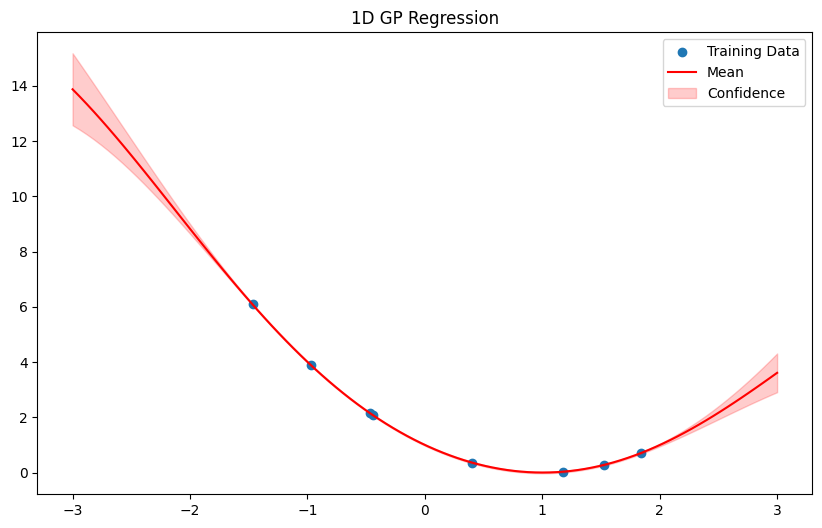


--- Training 2D model ---
2D Metrics:
  MSE  = 11404.7451
  NMSE = 0.7922
  MNLP = 14.1757


d:\python\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


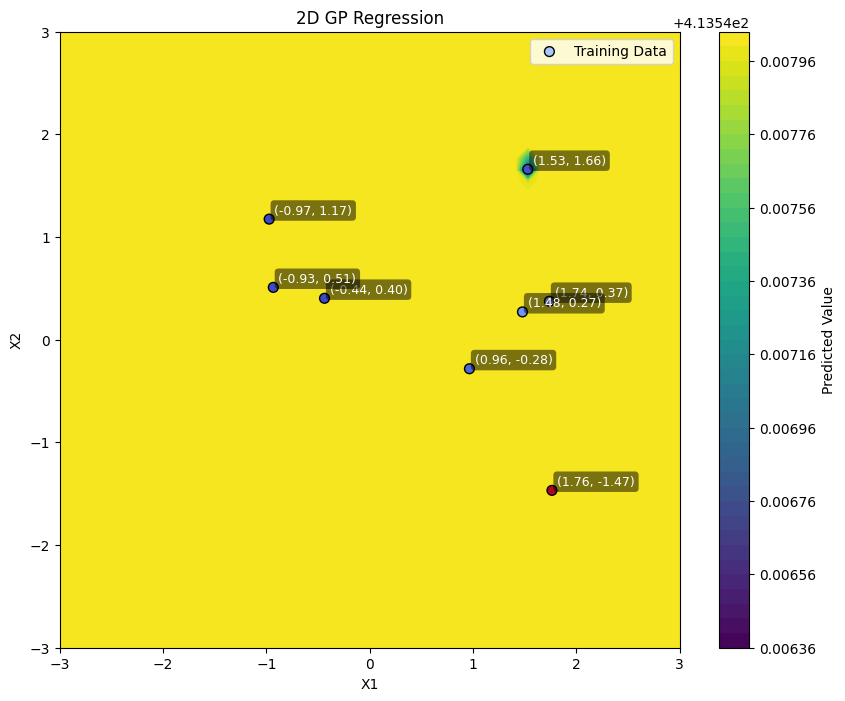


--- Training 3D model ---
3D Metrics:
  MSE  = 814123.5000
  NMSE = 224.1836
  MNLP = 67.2208

--- Training 4D model ---
4D Metrics:
  MSE  = 125627.4453
  NMSE = 1.5455
  MNLP = 14.8315

--- Training 5D model ---
5D Metrics:
  MSE  = 722689.0000
  NMSE = 0.5533
  MNLP = 16.6844

=== Summary Metrics for 1D to 5D ===
1D -> MSE: 0.0000, NMSE: 0.0001, MNLP: -6.8971
2D -> MSE: 11404.7451, NMSE: 0.7922, MNLP: 14.1757
3D -> MSE: 814123.5000, NMSE: 224.1836, MNLP: 67.2208
4D -> MSE: 125627.4453, NMSE: 1.5455, MNLP: 14.8315
5D -> MSE: 722689.0000, NMSE: 0.5533, MNLP: 16.6844


In [2]:
# Main entry point example
if __name__ == "__main__":
    # Create instances of required classes
    data_gen = generate_nd_data  # Function reference
    trainer = GPTrainer(gpytorch.likelihoods.GaussianLikelihood, OptimizerHandler)
    visualizer = Visualizer()
    
    # Run the main loop
    runner = MainRunner(data_gen, normalize_data, trainer, visualizer)
    results = runner.run()
    
    # Print summary
    print("\n=== Summary Metrics for 1D to 5D ===")
    for d, m in results.items():
        print(f"{d}D -> MSE: {m['MSE']:.4f}, NMSE: {m['NMSE']:.4f}, MNLP: {m['MNLP']:.4f}")